### MCMCS data analysis

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df1 = pd.read_csv('/Users/krystanafoh/datasets/MCMCS/monday.csv', sep=';', parse_dates=['timestamp'], index_col=['timestamp'])

df2 = pd.read_csv('/Users/krystanafoh/datasets/MCMCS/tuesday.csv', sep=';', parse_dates=['timestamp'], index_col=['timestamp'])

df3 = pd.read_csv('/Users/krystanafoh/datasets/MCMCS/wednesday.csv', sep=';', parse_dates=['timestamp'],index_col=['timestamp'])

df4 = pd.read_csv('/Users/krystanafoh/datasets/MCMCS/thursday.csv', sep=';', parse_dates=['timestamp'], index_col=['timestamp'])

df5 = pd.read_csv('/Users/krystanafoh/datasets/MCMCS/friday.csv', sep=';', parse_dates=['timestamp'],index_col=['timestamp'])

In [4]:
# complete dataframe:
df = pd.concat([df1, df2, df3, df4, df5], axis=0) 

<AxesSubplot:xlabel='location', ylabel='count'>

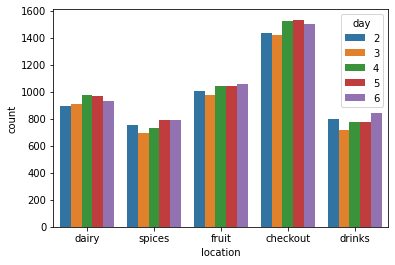

In [13]:
# plot location counts per day of week: 
sns.countplot(data=df, x="location", hue="day")

In [14]:
# try crosstab: 
pd.crosstab(df['customer_no'], df['location'])

location,checkout,dairy,drinks,fruit,spices
customer_no,,,,,
1,5,2,2,2,1
2,5,2,2,2,1
3,5,5,3,5,5
4,5,3,2,1,1
5,5,4,3,1,3
...,...,...,...,...,...
1531,2,0,2,0,1
1532,0,1,0,0,0
1533,0,1,0,0,0


### data analysis on df1

In [15]:
# 1:
# K___Calculate the total number of customers in each section

df1.groupby('location').count()

,customer_no
location,
checkout,1437
dairy,895
drinks,797
fruit,1005
spices,750


In [17]:
# 2:
# M __Calculate the total number of customers in each section over time ?!

# no of customers at locations in time interval: 
df1.between_time('08:00', '09:00').groupby('location', as_index=False).count().head()

,location,customer_no
0,checkout,115
1,dairy,69
2,drinks,67
3,fruit,70
4,spices,51


In [18]:
# 3:
# K __Display the number of customers at checkout over time

df_checkout = df1[df1['location'] == 'checkout']


In [19]:
df_checkout['hour'] = df_checkout.index.hour.copy()

<ipython-input-19-dbc214d89fdd>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_checkout['hour'] = df_checkout.index.hour.copy()


In [20]:
df_checkout = df_checkout.groupby('hour').count().head() #nunique??


In [21]:
df_checkout

,customer_no,location
hour,,
7,92,92
8,112,112
9,85,85
10,90,90
11,55,55


Text(0.5, 1.0, 'number of customers at checkout over time')

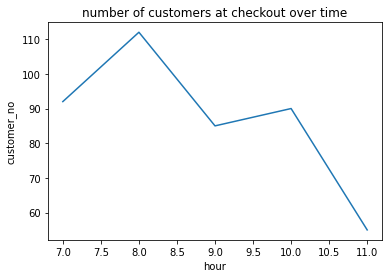

In [22]:
sns.lineplot(data=df_checkout, x=df_checkout.index, y='customer_no')
plt.title('number of customers at checkout over time')

In [23]:
# 4: 
# k__Calculate the time each customer spent in the market 
num_cust = len(df1['customer_no'].unique())
cust_time = {}

for x in range(num_cust):

        df =   df1[df1['customer_no'] == x]
        time_spend = df.index.max() - df.index.min()
        
        cust_time[x] = time_spend
          

In [24]:
pd.DataFrame.from_dict(cust_time, orient='index')

,0
0,NaT
1,0 days 00:02:00
2,0 days 00:03:00
3,0 days 00:02:00
4,0 days 00:04:00
...,...
1442,0 days 00:02:00
1443,0 days 00:01:00
1444,0 days 00:01:00
1445,0 days 00:00:00


<AxesSubplot:xlabel='timestamp', ylabel='customer_no'>

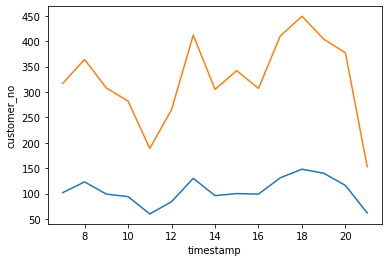

In [25]:
# 5: 
# K__Calculate the total number of customers in the supermarket over time.

#df1.groupby(df1.index.hour)['customer_no'].nunique()
sns.lineplot(data=df1.groupby(df1.index.hour)['customer_no'].nunique())
sns.lineplot(data=df1.groupby(df1.index.hour)['customer_no'].count())
#sns.lineplot(data=df1.groupby(df1.index.hour).count())

#### last task: 

In [31]:
# 5 whaaaaaat?:

# super complicated and slow attempt to get at least the location where people tend to go back to 
# after they went to 1 other location...

df_cust = df1.groupby('customer_no')

for x in  range(1, ((len(df_cust)) + 1)):
    
    df_cust_single = df1.groupby('customer_no').get_group(x)
    df_cust_single['return_to_first'] = ''
    

    if len(df_cust_single) >= 3 :
        
        if df_cust_single['location'].iloc[0] == df_cust_single['location'].iloc[2]:
            
            df_cust_single['return_to_first'].iloc[2] = 'return'

           
            df1 = pd.concat([df1, df_cust_single])
       
        
            

<ipython-input-31-3eddc1c33f05>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cust_single['return_to_first'] = ''
/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:692: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning

In [32]:
df1[df1['return_to_first'] == 'return']

,customer_no,location,return_to_first
timestamp,,,
2019-09-02 07:17:00,6,spices,return
2019-09-02 07:09:00,7,spices,return
2019-09-02 07:14:00,13,dairy,return
2019-09-02 07:18:00,25,spices,return
2019-09-02 07:25:00,34,spices,return
...,...,...,...
2019-09-02 20:52:00,1371,spices,return
2019-09-02 20:55:00,1385,fruit,return
2019-09-02 21:06:00,1396,fruit,return


In [42]:
df1[df1['return_to_first'] == 'return'].groupby('location').count()

,customer_no,return_to_first
location,,
dairy,47,47
drinks,31,31
fruit,49,49
spices,45,45
